# Data Modeling 

In [1]:
#libraries required
import pandas as pd 
import numpy as np
import os
import sys

In [2]:
#globally set column display options
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
#load dataset
file_path = "../data/processed/shot_events_processed.csv"

df= pd.read_csv(file_path)

print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 1494 rows and 23 columns


In [4]:
#confirm no missing values
print(df.isna().mean()*100)

#confirm data types
print(f"\n Data types in dataset \n{df.dtypes}")

location                 0.0
type_event               0.0
play_pattern             0.0
shot_xg                  0.0
shot_end_location        0.0
shot_type                0.0
shot_outcome             0.0
shot_technique           0.0
body_part                0.0
first_time_shot          0.0
1v1_shot                 0.0
under_pressure           0.0
aerial_shot_won          0.0
open_goal_shot           0.0
deflected_shot           0.0
shot_saved_to_post       0.0
shot_follows_dribble     0.0
shot_saved_off_target    0.0
shot_redirected          0.0
x_coordinate             0.0
y_coordinate             0.0
shot_distance            0.0
shot_angle               0.0
dtype: float64

 Data types in dataset 
location                  object
type_event                object
play_pattern              object
shot_xg                  float64
shot_end_location         object
shot_type                 object
shot_outcome              object
shot_technique            object
body_part                 obj

In [5]:
df.columns

Index(['location', 'type_event', 'play_pattern', 'shot_xg',
       'shot_end_location', 'shot_type', 'shot_outcome', 'shot_technique',
       'body_part', 'first_time_shot', '1v1_shot', 'under_pressure',
       'aerial_shot_won', 'open_goal_shot', 'deflected_shot',
       'shot_saved_to_post', 'shot_follows_dribble', 'shot_saved_off_target',
       'shot_redirected', 'x_coordinate', 'y_coordinate', 'shot_distance',
       'shot_angle'],
      dtype='object')

In [6]:
#change categorical features to type category: 

def typeToCategory(df,features):
    """Changes given features data type to category
        args:
        Dataframe and List of features

        Returns Dataframe    
    """
    if not isinstance(df, pd.DataFrame) or not isinstance(features,list):
        raise ValueError("Invalid input types. Expects Dataframe and list")
    
    try:
        for f in features:
            df[f] = df[f].astype('category')
        
        #validate changes 
        print(f"\nData types for categorical features : \n{df[features].dtypes}")
        return df
    except Exception as e:
        print(f"Error processing features:  {str(e)}")
        return None
        


In [7]:
#categorical features
cat_features =['shot_type','body_part','first_time_shot','1v1_shot','shot_outcome',
               'under_pressure','aerial_shot_won','open_goal_shot','deflected_shot',
               'shot_saved_to_post','shot_follows_dribble','shot_saved_off_target','shot_redirected',
               'play_pattern','shot_technique',
               ]
#Change to category
df_xg=typeToCategory(df,cat_features)


Data types for categorical features : 
shot_type                category
body_part                category
first_time_shot          category
1v1_shot                 category
shot_outcome             category
under_pressure           category
aerial_shot_won          category
open_goal_shot           category
deflected_shot           category
shot_saved_to_post       category
shot_follows_dribble     category
shot_saved_off_target    category
shot_redirected          category
play_pattern             category
shot_technique           category
dtype: object


In [8]:
#Feature selection
df_xg.head()

,location,type_event,play_pattern,shot_xg,shot_end_location,shot_type,shot_outcome,shot_technique,body_part,first_time_shot,1v1_shot,under_pressure,aerial_shot_won,open_goal_shot,deflected_shot,shot_saved_to_post,shot_follows_dribble,shot_saved_off_target,shot_redirected,x_coordinate,y_coordinate,shot_distance,shot_angle
0,"[92.6, 52.0]",Shot,From Goal Kick,0.023820,"[101.1, 47.5]",Open Play,Blocked,Normal,Right Foot,0,0,0,0,0,0,0,0,0,0,92.6,52.0,29.912539,0.223755
1,"[114.0, 54.8]",Shot,Regular Play,0.014060,"[114.6, 53.3]",Open Play,Blocked,Normal,Left Foot,0,0,0,0,0,0,0,0,0,0,114.0,54.8,15.969972,0.179792
2,"[93.4, 44.5]",Shot,From Throw In,0.033115,"[98.1, 43.9]",Open Play,Blocked,Normal,Right Foot,0,0,0,0,0,0,0,0,0,0,93.4,44.5,26.977954,0.266085
3,"[114.7, 29.6]",Shot,From Corner,0.043661,"[120.0, 43.4, 3.8]",Open Play,Off T,Normal,Head,0,0,0,0,0,0,0,0,0,0,114.7,29.6,11.672618,0.305878
4,"[115.3, 32.5]",Shot,From Corner,0.124033,"[116.0, 33.8]",Open Play,Blocked,Volley,Right Foot,1,0,0,0,0,0,0,0,0,0,115.3,32.5,8.850989,0.487160


The following features will not be included as predictors; 
1.  location - as is not useful in logistic regression model
2.  type_event - no variance in data type
3.  shot_xg - will be used for comparison of predicted value
4.  x_coordinate
5.  y_coordinate
6.  shot_end_location - as is not useful but can be engineered to derive where shot ended. (data leakage in training)
7.  shot_outcome - this is target value to be predicted (will convert to binary 1-goal, 0-no goal)
8.  shot_saved_to_post - describes what happens after the shot is taken (potential data leakage)
9.  shot_saved_off_target - describes what happens after the shot is taken (potential data leakage)
10. shot redirected - low variance (less than 1%)
11. shot deflected - low variance (less than 2%)
12. shot_follows_dribble - low variability (less than 2%)

to further narrow the list


In [9]:
df_xg.dtypes

location                   object
type_event                 object
play_pattern             category
shot_xg                   float64
shot_end_location          object
shot_type                category
shot_outcome             category
shot_technique           category
body_part                category
first_time_shot          category
1v1_shot                 category
under_pressure           category
aerial_shot_won          category
open_goal_shot           category
deflected_shot           category
shot_saved_to_post       category
shot_follows_dribble     category
shot_saved_off_target    category
shot_redirected          category
x_coordinate              float64
y_coordinate              float64
shot_distance             float64
shot_angle                float64
dtype: object

In [10]:
for f in df_xg.columns:
    if df_xg[f].dtypes == 'category':
        print(f"\n{f}: {df_xg[f].value_counts()}")


play_pattern: play_pattern
Regular Play      450
From Throw In     297
From Free Kick    285
From Corner       223
From Goal Kick     80
Other              68
From Counter       57
From Keeper        17
From Kick Off      17
Name: count, dtype: int64

shot_type: shot_type
Open Play    1382
Penalty        64
Free Kick      46
Corner          2
Name: count, dtype: int64

shot_outcome: shot_outcome
Off T               448
Blocked             379
Saved               346
Goal                195
Wayward              85
Post                 36
Saved to Post         3
Saved Off Target      2
Name: count, dtype: int64

shot_technique: shot_technique
Normal           1151
Half Volley       212
Volley             92
Diving Header      14
Lob                13
Overhead Kick       7
Backheel            5
Name: count, dtype: int64

body_part: body_part
Right Foot    780
Left Foot     449
Head          252
Other          13
Name: count, dtype: int64

first_time_shot: first_time_shot
0    1026
1     

In [11]:
#creating binary target feature
df_xg['goal'] = df_xg['shot_outcome'].apply(lambda x: 1 if x == "Goal" else 0)

#change type to category
df_xg['goal']= df_xg['goal'].astype('category')

#Verify creation of binary target feature
print(f"Verify target feature created: {df_xg['goal'].value_counts()}")

#Verify type changed
print(f"\nData type for feature goal: {df_xg['goal'].dtypes}")

Verify target feature created: goal
0    1299
1     195
Name: count, dtype: int64

Data type for feature goal: category


In [12]:
df_xg= df_xg[['play_pattern','shot_type','shot_technique',
       'body_part', 'first_time_shot', '1v1_shot', 'under_pressure',
       'aerial_shot_won', 'open_goal_shot','shot_distance','shot_angle', 'goal']]

In [13]:
numeric_features= df_xg.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Print numeric features to verify
print("Numeric features:", numeric_features)

#target feature
target = df_xg['goal']

# Get categorical features (non-numeric features)
categorical_features = df_xg.select_dtypes(include=['category']).columns.tolist()
categorical_features = [f for f in categorical_features if f != 'goal']
print("\nCategorical features:", categorical_features)

features= [f for f in df_xg.columns if f != 'goal']
print(f"\n All features for modeling:", features)


Numeric features: ['shot_distance', 'shot_angle']

Categorical features: ['play_pattern', 'shot_type', 'shot_technique', 'body_part', 'first_time_shot', '1v1_shot', 'under_pressure', 'aerial_shot_won', 'open_goal_shot']

 All features for modeling: ['play_pattern', 'shot_type', 'shot_technique', 'body_part', 'first_time_shot', '1v1_shot', 'under_pressure', 'aerial_shot_won', 'open_goal_shot', 'shot_distance', 'shot_angle']


In [14]:
#Manage low category in shot type
def combine_rare_categories(df, feature, min_samples=10, name='other'):
    """Combine categories with fewer than min_samples into 'Other'"""
    value_counts = df[feature].value_counts()
    rare_categories = value_counts[value_counts < min_samples].index
    df[feature] = df[feature].replace(rare_categories, name)
    return df

# Apply to shot type before train/test split
combine_rare_categories(df_xg, 'shot_type', min_samples=50, name='set pieces')

#verify change
print(f" Verify change in shot_type: \n{df_xg['shot_type'].value_counts()}")

 Verify change in shot_type: 
shot_type
Open Play     1382
Penalty         64
set pieces      48
Name: count, dtype: int64


C:\Users\On3B3\AppData\Local\Temp\ipykernel_43084\1463596409.py:6: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df[feature] = df[feature].replace(rare_categories, name)
C:\Users\On3B3\AppData\Local\Temp\ipykernel_43084\1463596409.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[feature] = df[feature].replace(rare_categories, name)


In [15]:
#train/test split

#import library
from sklearn.model_selection import train_test_split

In [16]:
X= df_xg[features]
y= target

In [17]:
#split data on 75/25 ratio
X_train,X_test, y_train, y_test = train_test_split(X,y, stratify=y, test_size=.25,random_state=42)

#Verify split successful
print(f"\nNumber of records in X_train: {len(X_train)/len(df_xg):.2f}")
print(f"\nNumber of records in X_test: {len(X_test)/len(df_xg):.2f}")
print(f"\nNumber of records in y_train: {len(y_train)/len(df_xg):.2f}")
print(f"\nNumber of records in y_test: {len(y_test)/len(df_xg):.2f}")


Number of records in X_train: 0.75

Number of records in X_test: 0.25

Number of records in y_train: 0.75

Number of records in y_test: 0.25


In [18]:
#create preprocessing pipeline

#import libraries
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [19]:
#building preprocessing pipeline 

#preprocessing pipeline
transformer = ColumnTransformer([
    ("scaler",StandardScaler(),numeric_features),
    ("encoder",OneHotEncoder(drop="first"),categorical_features)
])

#Model pipeline

pipe = Pipeline([
    ("preprocess",transformer),
    ("lgr",LogisticRegression(class_weight="balanced"))
])

In [20]:
#Model validation using Cross validation

#import library
from sklearn.model_selection import cross_val_score

In [21]:
#estimate performance of model: cross val= 5
model_est_peformance = cross_val_score(
    pipe,
    X_train,
    y_train,
    cv=5,
    scoring='roc_auc'
)

print("CV AUC Scores:",model_est_peformance)
print("Mean CV AUC:", model_est_peformance.mean())

CV AUC Scores: [0.84615385 0.80848806 0.86012378 0.856145   0.80180412]
Mean CV AUC: 0.8345429644416491


In [25]:
#Evaluate Train performance

#library required
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, roc_curve

import matplotlib.pyplot as plt

In [26]:
#fit pipelne on model
pipe.fit(X_train, y_train)

#make predictions using X_tran
y_train_pred = pipe.predict(X_train)

#get prediction probalities of class 1 (goal)
y_train_proba = pipe.predict_proba(X_train)[:,1]


Classification report:
              precision    recall  f1-score   support

           0       0.96      0.79      0.87       974
           1       0.36      0.80      0.50       146

    accuracy                           0.79      1120
   macro avg       0.66      0.79      0.68      1120
weighted avg       0.89      0.79      0.82      1120


Confusion Matrix: 
[[767 207]
 [ 29 117]]
ROC AUC Train Score: 0.87


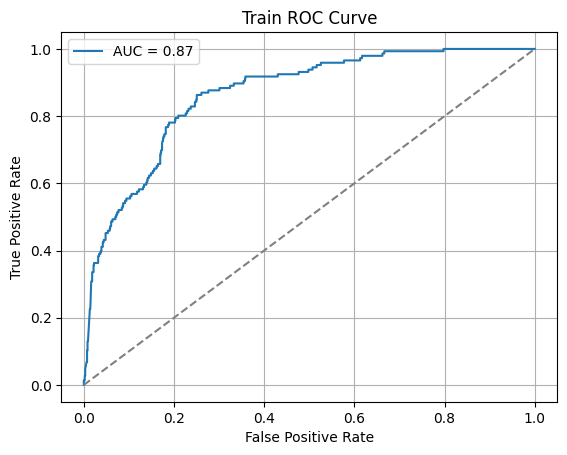

In [36]:
#get classification report
classif_report= classification_report(y_train,y_train_pred)
print(f'\nClassification report:\n{classif_report}')

#get confusion matrix
confu_matrix = confusion_matrix(y_train,y_train_pred)
print(f"\nConfusion Matrix: \n{confu_matrix}")

#create df for confusion matrix
df_cm = pd.DataFrame(confu_matrix, index=["No Goal","Goal"], columns=["No Goal","Goal"])

#ger ROC_AUC score
roc_auc_train=roc_auc_score(y_train, y_train_proba)
print(f"ROC AUC Train Score: {roc_auc_train:.2f}")

#get ROC Curve
false_pr,true_pr, _ =roc_curve(y_train,y_train_proba)
plt.plot(false_pr,true_pr,label=f"AUC = {roc_auc_train:.2f}")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

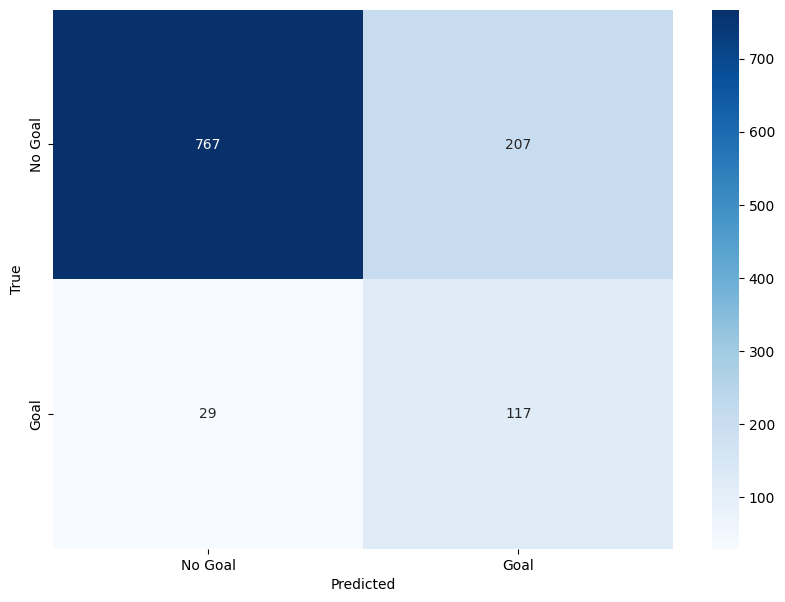

In [37]:
#library
import seaborn as sns

#plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_cm, annot=True,fmt='.0f',cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [38]:
#Test predictions

#make predictions using X_tran
y_test_pred = pipe.predict(X_test)

#get prediction probalities of class 1 (goal)
y_test_proba = pipe.predict_proba(X_test)[:,1]


Classification report Test:
              precision    recall  f1-score   support

           0       0.94      0.78      0.85       325
           1       0.31      0.67      0.43        49

    accuracy                           0.76       374
   macro avg       0.63      0.72      0.64       374
weighted avg       0.86      0.76      0.79       374


Confusion Matrix for Test: 
[[767 207]
 [ 29 117]]
ROC AUC Test Score: 0.76


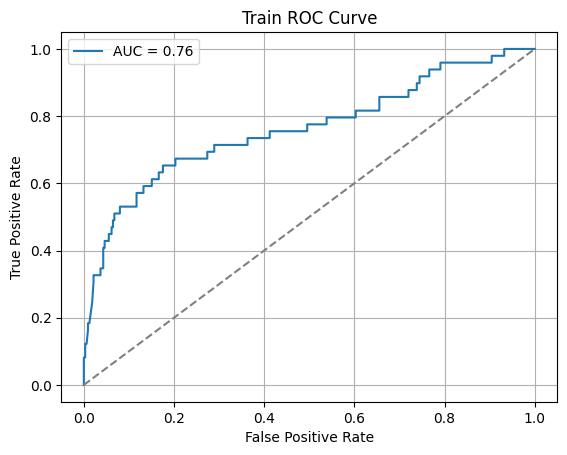

In [45]:
#get classification report
classif_report_test= classification_report(y_test,y_test_pred)
print(f'\nClassification report Test:\n{classif_report_test}')

#get confusion matrix
confu_matrix_test = confusion_matrix(y_test,y_test_pred)
print(f"\nConfusion Matrix for Test: \n{confu_matrix}")

#create df for confusion matrix
df_cm_test = pd.DataFrame(confu_matrix_test, index=["No Goal","Goal"], columns=["No Goal","Goal"])

#ger ROC_AUC score
roc_auc_test=roc_auc_score(y_test, y_test_proba)
print(f"ROC AUC Test Score: {roc_auc_test:.2f}")

#get ROC Curve
false_pos_r,true_pos_r, _ =roc_curve(y_test,y_test_proba)
plt.plot(false_pos_r,true_pos_r,label=f"AUC = {roc_auc_test:.2f}")
plt.plot([0,1],[0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Train ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

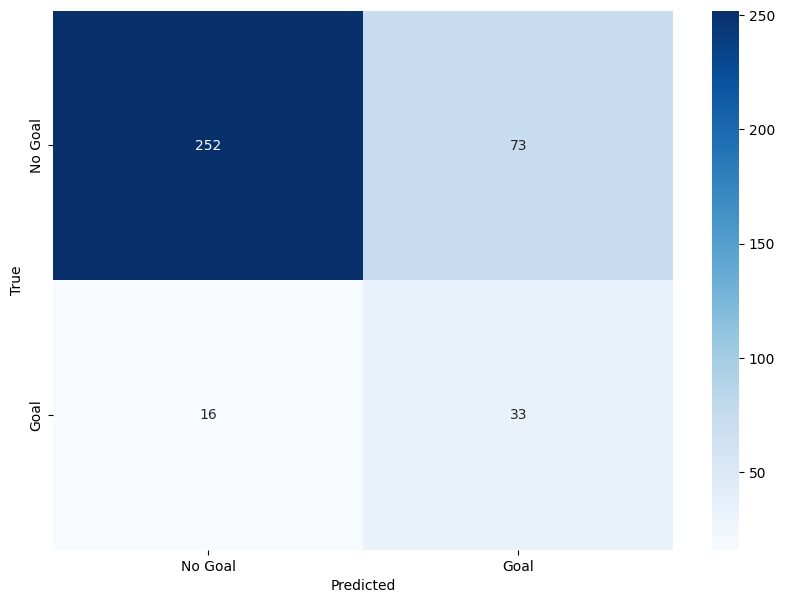

In [40]:
#plot heatmap
plt.figure(figsize=(10,7))
sns.heatmap(df_cm_test, annot=True,fmt='.0f',cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [41]:
#Hyperparameter tuning 
from sklearn.model_selection import GridSearchCV

In [55]:
#parameter grid for tuning 
param_grid = {
    'lgr__C': [0.01,0.3,0.6,0.1,],
    'lgr__penalty': ['l1', 'l2'],
    'lgr__solver': ['liblinear', 'saga'],
    'lgr__max_iter': [100, 200, 300],
    'lgr__tol': [1e-3, 6e-4,1e-4],
}

#run grid search with cross validation 
grid_search = GridSearchCV(pipe, 
                           param_grid, 
                           cv=5, 
                           scoring='roc_auc',
                           n_jobs=-1
                           )

In [49]:
print(pipe)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('scaler', StandardScaler(),
                                                  ['shot_distance',
                                                   'shot_angle']),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first'),
                                                  ['play_pattern', 'shot_type',
                                                   'shot_technique',
                                                   'body_part',
                                                   'first_time_shot',
                                                   '1v1_shot', 'under_pressure',
                                                   'aerial_shot_won',
                                                   'open_goal_shot'])])),
                ('lgr', LogisticRegression(class_weight='balanced'))])


In [56]:
#fit grid search on training set
grid_search.fit(X_train,y_train)

#get best params
best_params = grid_search.best_params_
print(f"Best parameters for estimator: \n{grid_search.best_params_}")

print("\n Best CV Score:",grid_search.best_score_) #mean cross-validated score of the best estimator

Best parameters for estimator: 
{'lgr__C': 0.6, 'lgr__max_iter': 100, 'lgr__penalty': 'l2', 'lgr__solver': 'liblinear', 'lgr__tol': 0.001}

 Best CV Score: 0.8337104742632648


c:\Users\On3B3\anaconda3\envs\myenv\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,
